In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

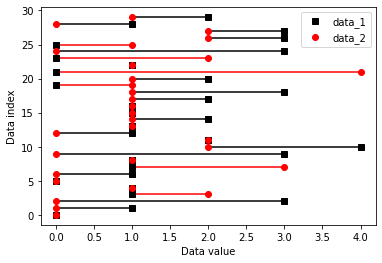

In [2]:
N = 30

data_1 = np.random.poisson(1.5, N)
data_2 = np.random.poisson(1, N)

colors = 'kr'
for i in range(N):
    plt.plot([data_1[i], data_2[i]], [i, i], colors[int(data_1[i] < data_2[i])])

plt.plot(data_1, np.arange(N), 'ks', markerfacecolor='k', label='data_1')
plt.plot(data_2, np.arange(N), 'ro', markerfacecolor='r', label='data_2')

plt.ylabel('Data index')
plt.xlabel('Data value')
plt.legend()

plt.show()

In [3]:
t, p = stats.wilcoxon(data_1,data_2)
print(f'Wilcoxon z={t}, p={p}')


Wilcoxon z=73.0, p=0.12819545597395157


c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:3269: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


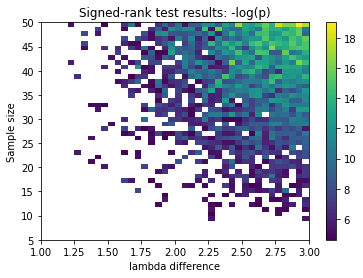

In [4]:
Ns = np.arange(5, 51)
lambdas = np.linspace(1, 3, 40)

pvals = np.zeros((len(Ns), len(lambdas)))

for ni in range(len(Ns)):
    for li in range(len(lambdas)):
        
        data_1 = np.random.poisson(lambdas[0], Ns[ni])
        data_2 = np.random.poisson(lambdas[li], Ns[ni])
        
        t, p = stats.wilcoxon(data_1, data_2)
        
        pvals[ni, li] = -np.log(p)
        

pvalthresh = .01
pvals[pvals <- np.log(pvalthresh)] = np.NaN


plt.imshow(pvals, origin='lower', extent=[lambdas[0] - 1, lambdas[-1] - 1, Ns[0], Ns[-1]], aspect='auto')
plt.xlabel('lambda difference')
plt.ylabel('Sample size')
plt.title('Signed-rank test results: -log(p)')
plt.colorbar()
plt.show()